# **OBESITY PREDICTION**

**Data Details:**

**Gender**: Gender

**Age**: Age

**Height** : in metres

**Weight** : in kgs

**family_history** : Has a family member suffered or suffers from overweight?

**FAVC** : Do you eat high caloric food frequently?

**FCVC** : Do you usually eat vegetables in your meals?

**NCP** : How many main meals do you have daily?

**CAEC** : Do you eat any food between meals?

**SMOKE** : Do you smoke?

**CH2O** : How much water do you drink daily?

**SCC** : Do you monitor the calories you eat daily?

**FAF**: How often do you have physical activity?

**TUE** : How much time do you use technological devices such as cell phone, videogames, television, computer and others?

**CALC** : How often do you drink alcohol?

**MTRANS** : Which transportation do
you usually use?

**Obesity_level** (Target Column) : Obesity level

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import sklearn.ensemble
import torch.nn as nn

In [ ]:
data = pd.read_csv('/content/Obesity prediction.csv')

In [ ]:
data

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# **Изучим данные. Посмотрим пропущенные значения. Оценим распределение**


In [ ]:
np.sum(data.isna())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [ ]:
len(data['Gender'])

2111

В дальнейшем блоке мы определим процент нанов для каждой колонки. В нашем случае это бесполезно, так как нанов нет, но это довольно удобный способ оценить наны и заполнить их или удалить соответствующие колонки.

In [ ]:
for column in data.columns:
  print(column, '->', np.sum(np.sum(data.isna()[column]))/len(data[column]))
  print()

Gender -> 0.0

Age -> 0.0

Height -> 0.0

Weight -> 0.0

family_history -> 0.0

FAVC -> 0.0

FCVC -> 0.0

NCP -> 0.0

CAEC -> 0.0

SMOKE -> 0.0

CH2O -> 0.0

SCC -> 0.0

FAF -> 0.0

TUE -> 0.0

CALC -> 0.0

MTRANS -> 0.0

Obesity -> 0.0



Наша выборка очень хорошая - нет пропущенных значений. Теперь оценим распределение данных  


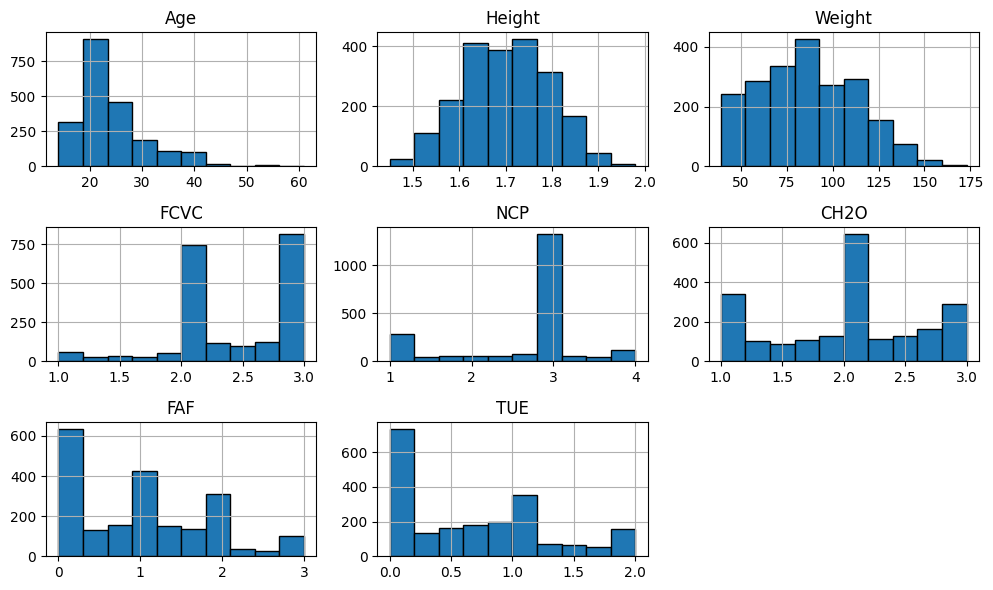

In [ ]:
data.hist(bins=10, figsize=(10, 6), edgecolor='black')
plt.tight_layout()
plt.show()

<Axes: xlabel='Obesity'>

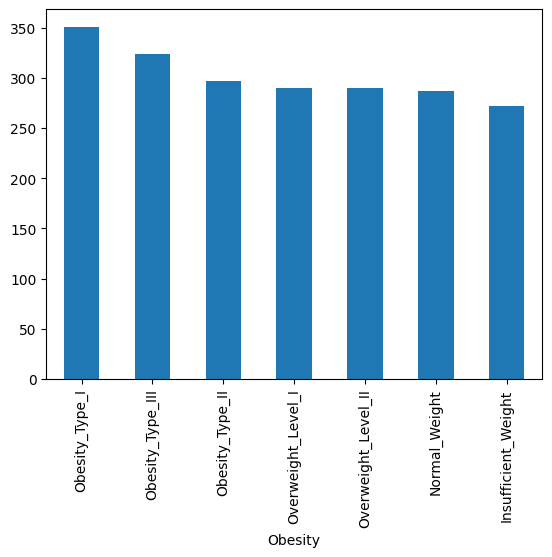

In [ ]:
data['Obesity'].value_counts().plot(kind='bar')

Наши данные более менее сбалансированные по таргету.


Обратим внимание на колонку NCP. Она показывает количество полных приемов пищи в день. Следует предположить, что это целое число, однако в данных мы наблюдаем следующее:

In [ ]:
data['NCP'].value_counts()

,count
NCP,
3.000000,1203
1.000000,199
4.000000,69
2.776840,2
3.985442,2
...,...
3.054899,1
3.118013,1
3.335876,1


**Чтобы избежать влияния выбросов, следует округлить дробные значения**

Так же вроятно всего это нелинейная зависимость, но это еще следует изучить.

**Заодно округлим и возраст.**


Оценим корреляцию числовых признаков


In [ ]:
num_features = []
cat_features = []
for column in data.columns:
      if (data[column].dtype) == 'object':
        cat_features.append(column)
      else:
        num_features.append(column)

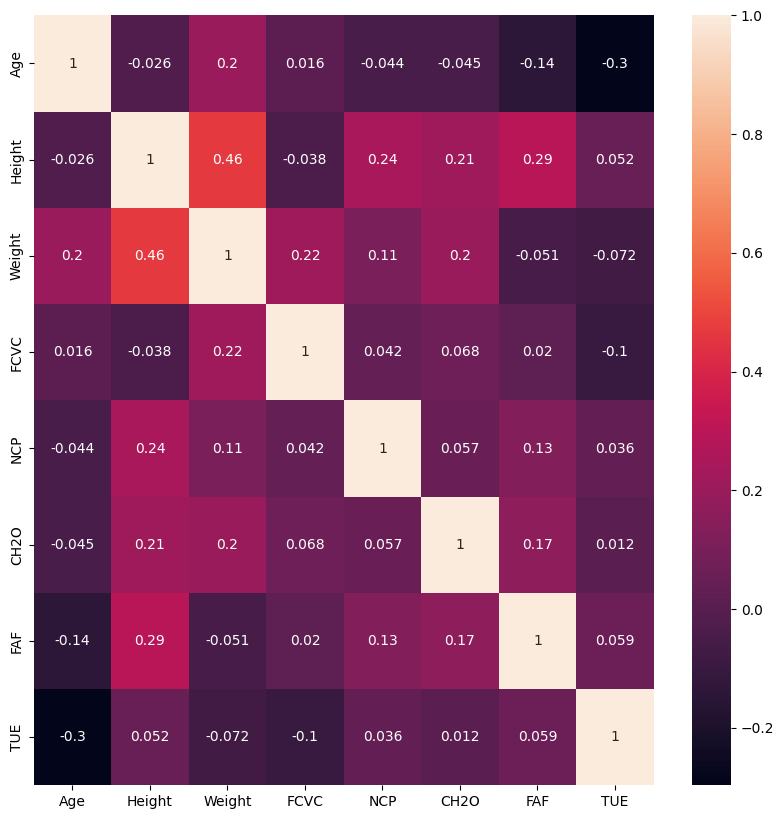

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data[num_features].corr(),annot=True)
plt.show()

У нас присутствует средняя корреляция между признаками Age и TUE. Возраст и частота использования гаджетов. Можно попробовать применить PCA для замены этих признаков на один. В остальном корреляция между признаками довльно слабая


Перед применением PCA данные нужно нормализовать

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca_transformed = pca.fit_transform(data[['TUE','Age']])
pca_transformed

array([[-3.32105982],
       [-3.29233867],
       [-1.3218849 ],
       ...,
       [-1.78749353],
       [ 0.05137881],
       [-0.6492398 ]])

Получили один признак вместо двух который объясняет наибольшую дисперсию о есть является информативным, однако потерял свою интерпретируемость. **В дальнейшем решении PCA мной использоваться не будет**

# **Реализуем препроцессинг данных с помощью отдельного класса и пайплайна:**

In [ ]:
from sklearn.model_selection import train_test_split

y = data['Obesity']
X = data.drop(columns='Obesity')


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
162,Female,21.000000,1.630000,60.000000,yes,yes,3.000000,3.000000,Always,yes,2.000000,no,2.000000,0.000000,Sometimes,Public_Transportation
2001,Female,20.924956,1.752531,133.618706,yes,yes,3.000000,3.000000,Sometimes,no,2.887659,no,1.480919,0.779641,Sometimes,Public_Transportation
1435,Female,22.899740,1.661715,82.595793,yes,yes,1.203754,1.355354,Sometimes,no,2.765593,no,0.128342,1.659476,Sometimes,Public_Transportation
649,Female,21.837996,1.588046,44.236067,no,no,3.000000,1.696080,Frequently,no,2.550307,no,1.098862,0.000000,no,Public_Transportation
1280,Male,25.994746,1.811602,106.042142,yes,yes,3.000000,3.000000,Sometimes,no,2.858171,no,1.813318,0.680215,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Male,32.290160,1.754956,120.098812,yes,yes,2.967300,3.000000,Sometimes,no,2.530035,no,0.955317,1.339232,Sometimes,Automobile
1095,Male,23.000000,1.718981,81.669950,yes,yes,2.000000,1.729553,Sometimes,no,1.400247,no,0.887923,1.011983,Sometimes,Public_Transportation
1130,Female,22.989846,1.650000,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.146919,2.000000,no,Public_Transportation
1294,Female,23.000000,1.628168,84.497980,yes,yes,2.058687,2.962004,Sometimes,no,2.010596,no,0.851059,0.630866,no,Public_Transportation


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder

class Preproseccor(BaseEstimator, TransformerMixin):
  def __init__(self, scaler=StandardScaler(), encoder=OneHotEncoder(drop='first', sparse_output=False)):
    self.scaler = scaler
    self.encoder = encoder
  def fit(self, X, y=None):
    self.cat_features = []
    self.num_features = []

    for column in X.columns:
      if (X[column].dtype) == 'object':
        self.cat_features.append(column)
      else:
        self.num_features.append(column)

    self.encoder.fit(X[self.cat_features])
    self.scaler.fit(X[self.num_features])

    return self
  def transform(self, X):
    X = X.copy()
    X['Age'] = X['Age'].round()
    X['NCP'] = X['NCP'].round()
    X[self.num_features] = self.scaler.transform(X[self.num_features])
    X_new_cat = pd.DataFrame(self.encoder.transform(X[self.cat_features]),
                         columns=self.encoder.get_feature_names_out(self.cat_features),
                         index=X.index)
    X.drop(columns=self.cat_features, inplace=True)
    X = pd.concat([X,X_new_cat], axis=1)
    return X


In [ ]:
pr = Preproseccor()
pr.fit(X_train)
X_new = pr.transform(X_train)
X_val_new = pr.transform(X_val)
X_val_new

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
544,-0.687082,0.583046,-1.260886,-0.785729,1.679753,-0.233421,2.222730,2.250028,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1987,0.239533,-0.822189,0.935422,1.076717,0.401513,1.145576,-1.196238,-0.533927,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
420,-0.995953,1.591404,-1.019413,1.076717,1.679753,-0.010142,1.186213,-1.069472,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
527,-0.532646,-1.947746,-1.709288,1.076717,-2.154968,-1.651053,-1.196238,-1.069472,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
196,-0.378210,0.518934,-0.482843,-0.785729,0.401513,-0.010142,-0.005012,2.250028,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,-0.841518,1.055169,0.015400,-0.785729,1.679753,-0.010142,1.186213,0.590278,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1793,1.011712,-0.551509,0.557384,0.915526,-0.876727,-1.651053,1.055103,-0.440729,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
73,-0.841518,1.591404,-0.827781,-0.785729,0.401513,1.630769,1.186213,0.590278,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1711,0.702841,0.611359,1.031109,-0.189372,0.401513,0.260254,-1.196238,1.362857,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# **Пример использования пайплайна с помощью встроенного класса Pipeline для препроцессинга (не самый удобный способ, так как любые преобразования следует реализовывать в виде отдельного класса)**

In [ ]:
class SelectiveRoundTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_round, decimals=0):
        self.columns_to_round = columns_to_round
        self.decimals = decimals

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = pd.DataFrame(X)  # Преобразуем в DataFrame если это numpy array
        for col in self.columns_to_round:
            if col in X.columns:
                X[col] = X[col].round(self.decimals)
        return X

NameError: name 'BaseEstimator' is not defined

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train) # обработка таргета отдельно
y_val = encoder.transform(y_val)


cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('scale', OneHotEncoder(drop='first', sparse_output=False))])


num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('round', SelectiveRoundTransformer(columns_to_round=['Age', 'NCP'])),
    ('scale', StandardScaler())
    ]
    )


col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline, num_features), # препроцессинг целиком
    ('cat_pipeline',cat_pipeline, cat_features),
    ],
    remainder='drop', # игнорирует другие колонки кроме указанных
    n_jobs=-1) # параллельные процессы



data = col_trans.fit_transform(X_train)

data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.532646,-0.768029,-1.019413,1.076717,0.401513,-0.010142,1.186213,-1.069472,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.544235,0.546078,1.802127,1.076717,0.401513,1.446428,0.567871,0.224537,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.239258,-0.427896,-0.153398,-2.268694,-1.700740,1.246128,-1.043353,1.684843,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.403229,-1.217973,-1.623588,1.076717,-1.265210,0.892863,0.112755,-1.069472,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.238722,1.179597,0.745216,1.076717,0.401513,1.398040,0.963833,0.059515,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1.210959,0.572086,1.283958,1.015815,0.401513,0.859598,-0.058240,1.153318,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1684,-0.223774,0.186265,-0.188882,-0.785729,-1.222424,-0.994283,-0.138521,0.610167,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1685,-0.225342,-0.553536,-0.252885,-0.785729,0.401513,-0.010142,-1.021224,2.250028,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1686,-0.223774,-0.787677,-0.080494,-0.676427,0.352945,0.007245,-0.182435,-0.022392,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Пайпланы не работают с LabelEncoding, так как подразумевается что это для таргета а трансформеры работают с данными, а не таргетом
  **Так же лейблэнкодер позволяет обработать только один столбец в методе transform, а не все - то есть все таки это больше для таргета**

# **Оценка метрик на моделях**


Оценим метрики на бейзлайн модели логистической регресии

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train) # обработка таргета отдельно
y_val = encoder.transform(y_val)

## обработку таргета выше можно и не делать так как sckit-learn сам разбирается с таргетом
clf_pipeline = Pipeline(steps=[
            ('preproseccor', pr),
            ('model', model)
        ])
clf_pipeline.fit(X_train,y_train)
y_val_predicted = clf_pipeline.predict(X_val)
y_val_predicted_proba = clf_pipeline.predict_proba(X_val)
accuracy = accuracy_score(y_val, y_val_predicted)
print(f'Aссuracy:{accuracy}')
auc = roc_auc_score(y_val, y_val_predicted_proba, multi_class='ovr', average='macro')
print(f'AUC: {auc}')



Aссuracy:0.8723404255319149
AUC: 0.9879284785561789


Попробуем использовать градиентный бустинг и найдем гиперпараметры с помощью optuna. Так же в этом блоке я использую пайплайн который я написал ранее

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.0 MB/s eta 0:00:00


In [ ]:
y_train

,Obesity
162,Normal_Weight
2001,Obesity_Type_III
1435,Obesity_Type_I
649,Insufficient_Weight
1280,Obesity_Type_I
...,...
1638,Obesity_Type_II
1095,Overweight_Level_II
1130,Overweight_Level_II
1294,Obesity_Type_I


In [ ]:
from catboost import CatBoostClassifier

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train) # обработка таргета отдельно
y_val = encoder.transform(y_val)

estimator = CatBoostClassifier(loss_function='MultiClass',verbose=False)

clf_pipeline = Pipeline(steps=[
            ('preproseccor', pr),
            ('model', estimator)
        ])
clf_pipeline.fit(X_train,y_train)
y_val_predicted = clf_pipeline.predict(X_val)
y_val_predicted_proba = clf_pipeline.predict_proba(X_val)
accuracy = accuracy_score(y_val, y_val_predicted)
print(f'Accuaccuracy)
auc = roc_auc_score(y_val, y_val_predicted_proba, multi_class='ovr', average='macro')
print(f'AUC: {auc}')

Accuracy:0.9692671394799054
AUC: 0.9990380607543028


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.4 MB/s eta 0:00:00


Пример использования кросс валидации

In [ ]:
from sklearn.model_selection import cross_val_score
>>> clf = svm.SVC(kernel='linear', C=1, random_state=42)
>>> scores = cross_val_score(clf, X, y, cv=5)
>>> scores
>>array([0.96..., 1. , 0.96..., 0.96..., 1. ])

In [ ]:
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
0.98 accuracy with a standard deviation of 0.02